# SONAR ROCK VS MINE PREDICTION

There is war is going on between two countries.

 Movement by air is impossible due to detection missiles.
 
 Moving by land is too slow and very dangerous.
 
 The submarine of one country is going under the water to another country.
 
 The enemy country has planted some mines in the ocean.
 
 The mines are explodes when some object comes in contact with it.
 
 The ocean also contains rocks.
 
 The submarine needs to predict the object that it is crossing. is it mine or rock?
 
 The submarine uses sonar signal that sends sound and receives switchbacks.
 
 This signal in the processed to detect whether the object is a mine or or a rock in the ocean.



# PROBLEM STATEMENT


Predict whether the object beneath the submarine is a mine or a rock.



# IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline



DATA COLLECTION AND DATA PREPROCESSING

In [2]:
#loading the dataset
sonar_data=pd.read_csv("C:\\Users\\Arindam\\Documents\\Downloads\\Copy of sonar data.csv",header=None)

# ANALYSIS AND EXPLORATION🔎

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000,...,52.0000,53.0000,54.0000,55.0000,56.0000,57.0000,58.0000,59.0000,60.0000,61
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R


In [4]:
#number of rows and columns
sonar_data.shape

(209, 61)

In [5]:
#describe --> statistical measures of the data
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.00000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,0.033809,0.047822,0.057977,0.072773,0.098766,0.132778,0.154657,0.172432,0.220213,0.255110,...,0.260011,0.26216,0.264246,0.269262,0.272404,0.276125,0.280510,0.285423,0.290200,0.293557
std,0.070963,0.139611,0.208045,0.276876,0.345134,0.412036,0.479755,0.550639,0.621554,0.690455,...,3.526653,3.59600,3.665353,3.734508,3.803793,3.873037,3.942236,4.011399,4.080571,4.149840
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.00080,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013400,0.016500,0.019000,0.024400,0.038400,0.067100,0.081200,0.080500,0.097300,0.111400,...,0.008500,0.00730,0.005100,0.005400,0.004200,0.004400,0.003700,0.003600,0.003700,0.003100
50%,0.022800,0.030800,0.034400,0.044100,0.063000,0.092200,0.108300,0.112300,0.152300,0.183800,...,0.014000,0.01150,0.009600,0.009300,0.007500,0.006900,0.006000,0.005800,0.006500,0.005300
75%,0.036300,0.048400,0.058700,0.068100,0.102600,0.134200,0.154300,0.170200,0.235300,0.269600,...,0.020900,0.01680,0.014900,0.014500,0.012100,0.010800,0.010500,0.010500,0.010400,0.008600
max,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,51.000000,52.00000,53.000000,54.000000,55.000000,56.000000,57.000000,58.000000,59.000000,60.000000


In [6]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       209 non-null    float64
 1   1       209 non-null    float64
 2   2       209 non-null    float64
 3   3       209 non-null    float64
 4   4       209 non-null    float64
 5   5       209 non-null    float64
 6   6       209 non-null    float64
 7   7       209 non-null    float64
 8   8       209 non-null    float64
 9   9       209 non-null    float64
 10  10      209 non-null    float64
 11  11      209 non-null    float64
 12  12      209 non-null    float64
 13  13      209 non-null    float64
 14  14      209 non-null    float64
 15  15      209 non-null    float64
 16  16      209 non-null    float64
 17  17      209 non-null    float64
 18  18      209 non-null    float64
 19  19      209 non-null    float64
 20  20      209 non-null    float64
 21  21      209 non-null    float64
 22  22

In [7]:
#checking for null values
sonar_data.isnull().sum().sum()

0

In [8]:
sonar_data[60].value_counts()

M     111
R      97
61      1
Name: 60, dtype: int64

M-->MINE

R-->ROCK

In [9]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
61,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,51.000000,52.000000,53.000000,54.000000,55.000000,56.000000,57.000000,58.000000,59.000000,60.000000
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


CORRELATION MATRIX

A correlation matrix is used to examine the relationship between multiple variables at the same time.

When we do this calculation we get a table containing the correlation coefficients between each variable and the others. 

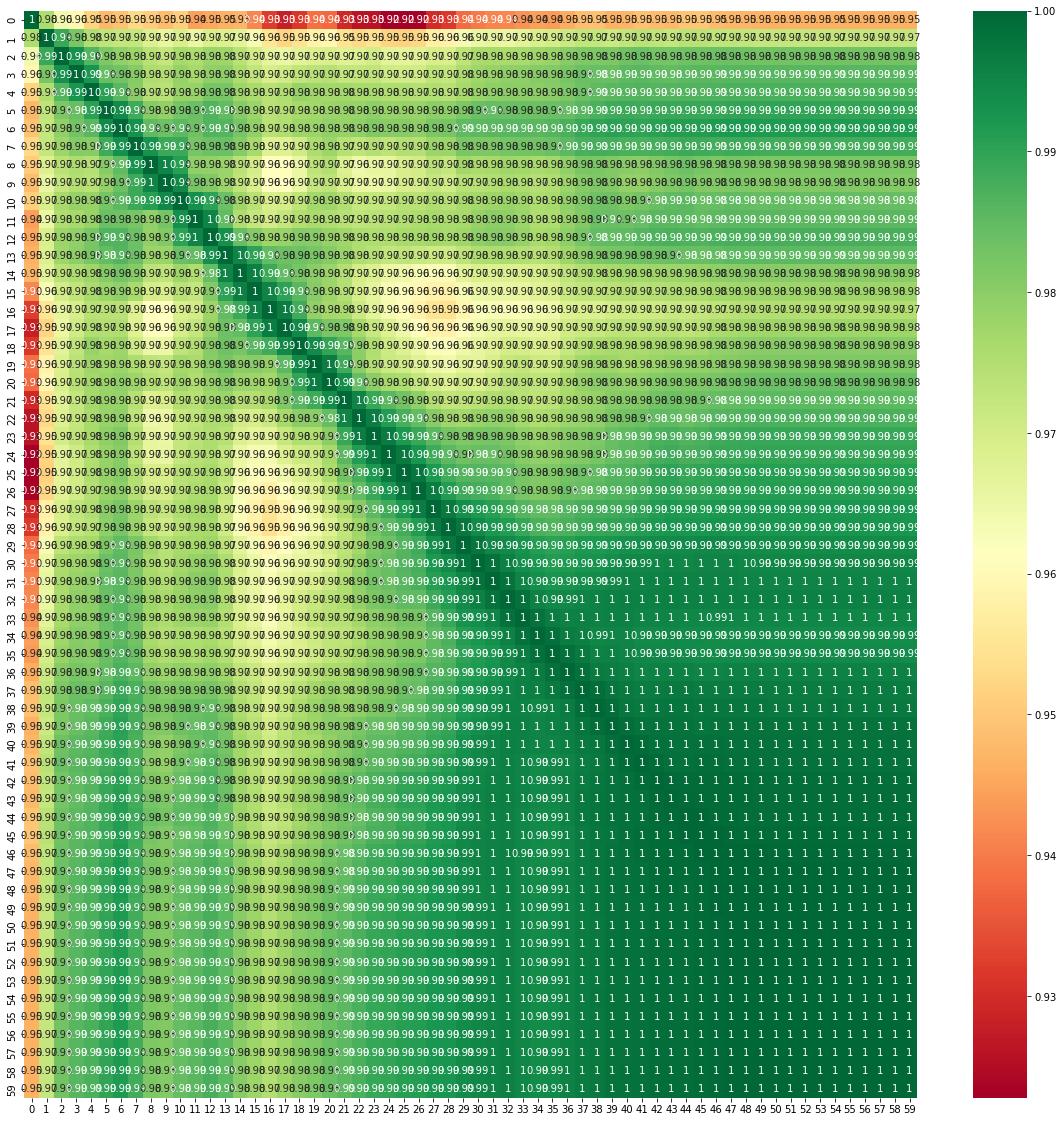

In [10]:
corrmat = sonar_data.corr()  #to find the pairwise correlation of all columns in the dataframe.
plt.figure(figsize=(20,20))
# Plot heat map

g = sns.heatmap(sonar_data.corr(),annot=True,cmap='RdYlGn')

In [11]:
#separating the data and the target i.e.Label
X=sonar_data.drop(columns=60,axis=1)#independent data
Y=sonar_data[60]#dependent data

In [12]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    1.0000  2.0000  3.0000  4.0000  5.0000  6.0000  7.0000  8.0000  9.0000   
1    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
2    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
3    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
4    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
204  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
205  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
206  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
207  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
208  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

          9   ...       50       51       52       

In [13]:
print(Y)

0      61
1       R
2       R
3       R
4       R
       ..
204     M
205     M
206     M
207     M
208     M
Name: 60, Length: 209, dtype: object


# SPLITTING INTO TRAINING AND TEST DATA

In [14]:
#splitting data into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1,  random_state=1)

In [15]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(209, 60)
(188, 60)
(21, 60)
(188,)


In [16]:
print(Y_train)

31     R
106    M
176    M
40     R
59     R
      ..
203    M
137    M
72     R
140    M
37     R
Name: 60, Length: 188, dtype: object


# MODEL TRAINING

In [17]:
#implementing various machine learning algorithm and checking the accuracy

def models(X_train,Y_train):
    print("MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY")
    print("")
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    print("[0]Logistic regression       Train Accuracy:  " ,log.score(X_train,Y_train), "  Test Accuracy:   ", log.score(X_test,Y_test))
    print("")
    
    from sklearn.neighbors import KNeighborsClassifier
    knn =  KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski',p =2)
    knn.fit(X_train,Y_train)
    print("[1]  KNN algorithm        Train Accuracy:  " ,knn.score(X_train,Y_train), "   Test Accuracy:   ", knn.score(X_test,Y_test))
    print("")
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state= 0)
    svc_lin.fit(X_train,Y_train)
    print("[2]SVM(svc)               Train Accuracy:   " ,svc_lin.score(X_train,Y_train), "  Test Accuracy:   ", svc_lin.score(X_test,Y_test))
    print("")
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state= 0)
    svc_rbf.fit(X_train,Y_train)
    print("[3] SVM(rbf)              Train accuracy:   " ,svc_rbf.score(X_train,Y_train), "  Test Accuracy:  ", svc_rbf.score(X_test,Y_test))
    print("")

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    print("[4] Naive Bayes Accuracy   Train Accuracy:   " ,gauss.score(X_train,Y_train), "   Test Accuracy:   ", gauss.score(X_test,Y_test))
    print("")
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
    tree.fit(X_train,Y_train)
    print("[5] Desion Tree Algorithm  Train Accuracy:   " ,tree.score(X_train,Y_train), "                Test Accuracy:   ", tree.score(X_test,Y_test))
    print("")
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators =10, criterion='entropy',random_state = 0)
    forest.fit(X_train,Y_train)
    print("[6] Random Forest          Train Accuracy:   " ,forest.score(X_train,Y_train), "   Test Accuracy:   ", forest.score(X_test,Y_test))
    print("")



   
   
  
   
   
   
   
   

In [18]:
model = models(X_train,Y_train)

MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY



C:\Users\Arindam\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic regression       Train Accuracy:   0.8563829787234043   Test Accuracy:    0.9047619047619048

[1]  KNN algorithm        Train Accuracy:   0.8829787234042553    Test Accuracy:    0.7142857142857143

[2]SVM(svc)               Train Accuracy:    0.8297872340425532   Test Accuracy:    0.8095238095238095

[3] SVM(rbf)              Train accuracy:    0.5531914893617021   Test Accuracy:   0.38095238095238093

[4] Naive Bayes Accuracy   Train Accuracy:    0.723404255319149    Test Accuracy:    0.5714285714285714

[5] Desion Tree Algorithm  Train Accuracy:    1.0                 Test Accuracy:    0.7619047619047619

[6] Random Forest          Train Accuracy:    0.9893617021276596    Test Accuracy:    0.8095238095238095



NOTE: We applied 6 machine learning algorithms.

We got overfitting in 2 algorithms Decision Tree Algorithm and Random Forest.

Logistic Regression algorithm gives good accuracy therefore lets use this algorithm to predict

# Predicting New Data

In [19]:
#training model with Logistic Regression algorithm

from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\Arindam\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
input_data = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [23]:
#making predictions
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['R']
The object is a Rock
